In [1]:
library(statsr)
library(dplyr)
library(ggplot2)

Warning message:
: package 'dplyr' was built under R version 3.3.1
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
: package 'ggplot2' was built under R version 3.3.1

In [2]:
#load data on nyc plane flights and their delays
data(nycflights)
str(nycflights)
names(nycflights)

Classes 'tbl_df' and 'data.frame':	32735 obs. of  16 variables:
 $ year     : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month    : int  6 5 12 5 7 1 12 8 9 4 ...
 $ day      : int  30 7 8 14 21 1 9 13 26 30 ...
 $ dep_time : int  940 1657 859 1841 1102 1817 1259 1920 725 1323 ...
 $ dep_delay: num  15 -3 -1 -4 -3 -3 14 85 -10 62 ...
 $ arr_time : int  1216 2104 1238 2122 1230 2008 1617 2032 1027 1549 ...
 $ arr_delay: num  -4 10 11 -34 -8 3 22 71 -8 60 ...
 $ carrier  : chr  "VX" "DL" "DL" "DL" ...
 $ tailnum  : chr  "N626VA" "N3760C" "N712TW" "N914DL" ...
 $ flight   : int  407 329 422 2391 3652 353 1428 1407 2279 4162 ...
 $ origin   : chr  "JFK" "JFK" "JFK" "JFK" ...
 $ dest     : chr  "LAX" "SJU" "LAX" "TPA" ...
 $ air_time : num  313 216 376 135 50 138 240 48 148 110 ...
 $ distance : num  2475 1598 2475 1005 296 ...
 $ hour     : num  9 16 8 18 11 18 12 19 7 13 ...
 $ minute   : num  40 57 59 41 2 17 59 20 25 23 ...


[1] "year"      "month"     "day"       "dep_time"  "dep_delay" "arr_time" 
 [7] "arr_delay" "carrier"   "tailnum"   "flight"    "origin"    "dest"     
[13] "air_time"  "distance"  "hour"      "minute"

In [3]:
## filtering with dplyr (multiple criteria)
sfo_feb_flights <- nycflights %>%
  filter(dest == "SFO", month == 2) 

In [5]:
#qz q1 how many sfo flighrts in this df
nrow(sfo_feb_flights)

[1] 68

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


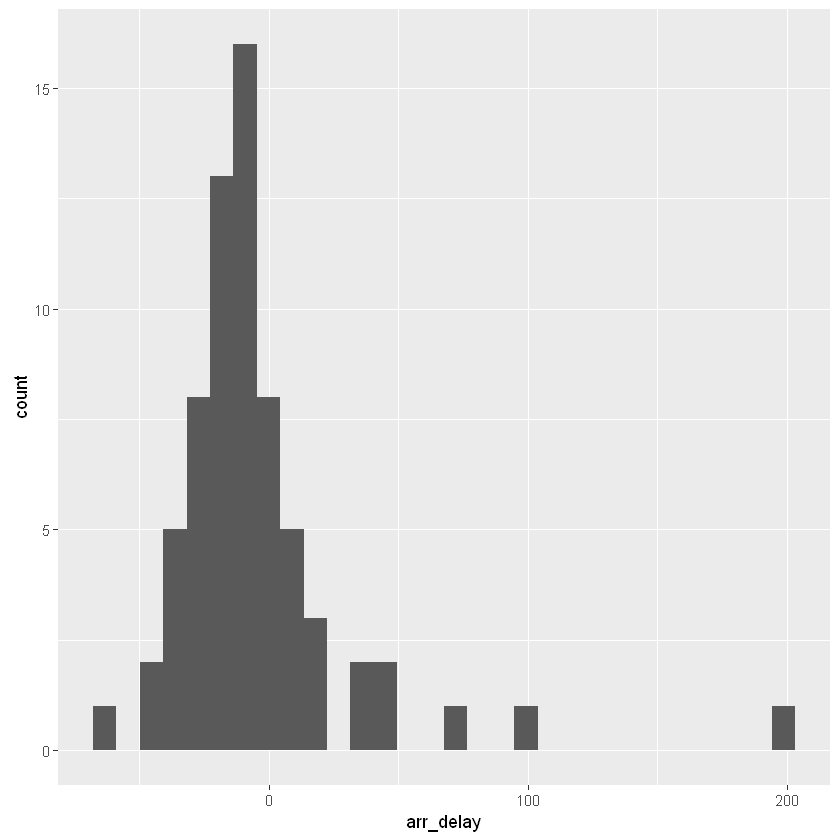

In [15]:
#hist for arrival delays
ggplot(data = sfo_feb_flights, aes(x = arr_delay)) +
  geom_histogram()


In [16]:
#summary stats
sfo_feb_flights %>%
  summarise(mean_ad = mean(arr_delay), sd_dd = sd(arr_delay), n = n())

,mean_ad,sd_dd,n
1,-4.50000,36.28062,68.00000


#### qz q2  false: No flight is delayed more than 2 hours.

In [8]:
sfo_feb_flights %>%
group_by(carrier) %>%
summarise(arr_med=median(arr_delay), arr_iqr=IQR(arr_delay))

,carrier,arr_med,arr_iqr
1,AA,5,17.5
2,B6,-10.5,12.25
3,DL,-15,22
4,UA,-10,22
5,VX,-22.5,21.25


#### qz q3 Which carrier is the has the hights IQR of arrival delays?  DL and UA

In [10]:
#which month would you expect to have the highest
# average delay departing from an NYC airport?
nycflights %>%
  group_by(month) %>%
  summarise(mean_dd = mean(dep_delay)) %>%
  arrange(desc(mean_dd))

,month,mean_dd
1,7.00000,20.75456
2,6.00000,20.35029
3,12.00000,17.36819
4,4.00000,14.55448
5,3.0000,13.5176
6,5.0000,13.2648
7,8.0000,12.6191
8,2.00000,10.68723
9,1.00000,10.23333
10,9.000000,6.872436


##### qz q4  longeset delay in July

In [12]:
  nycflights %>%
  group_by(month) %>%
  summarise(med_dd = median(dep_delay)) %>%
  arrange(desc(med_dd))

,month,med_dd
1,12,1
2,6,0
3,7,0
4,3,-1
5,5,-1
6,8,-1
7,1,-2
8,2,-2
9,4,-2
10,11,-2


#### qz q5 Which month has the highest median departure delay from an NYC airport?  December

#### qz q6  which measure is more realiable? Median would be more reliable as the distribution of delays is skewed.

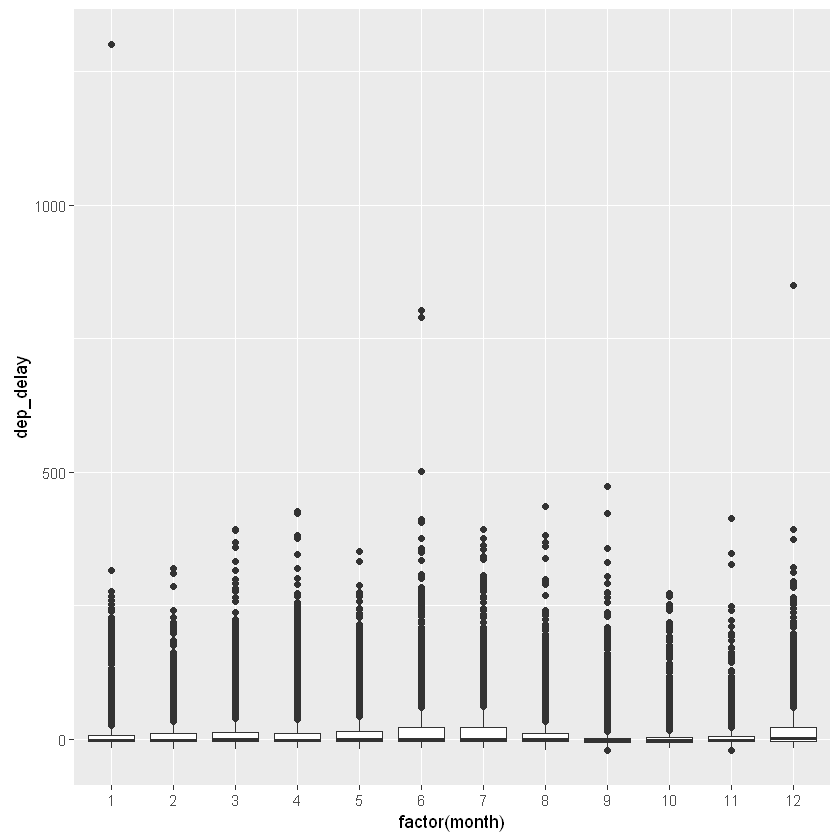

In [19]:
#visualize the distributions of departure delays across months using side-by-side box plots:
  ggplot(nycflights, aes(x = factor(month), y = dep_delay)) +
  geom_boxplot()